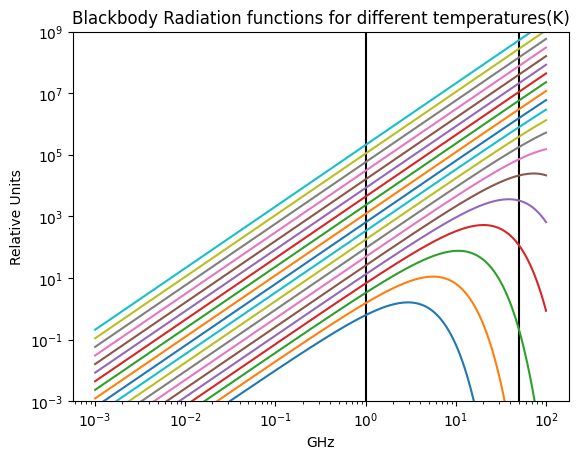

In [121]:
import numpy as np
import matplotlib.pyplot as plt

def Bv(v, T):
    # coeff = 2*h/c**2
    coeff = 1
    # power = h /(k)
    power = 6.62607015/1.380649 *10**(-2)
    # 2*h *v**3 /c**2
    # h*v /(k*T)
    result = (coeff * (v)**3) * 1/(np.exp(power *v/T) -1)
    return result

# h = Placnk constant
h = 6.62607015*10**(-34) # J*Hz**(-1)
# Speed of light in a vacuum
c = 299792458 #m/s
# Boltzmann constant
k = 1.380649*10**(-23) #J*K**(−1)

# b = 2.897771955*10**3 #m*K
# b = h*c/k *1/(5+Wo*(-5*np.exp(-5)))

Y_vert = np.geomspace(10**(-3), 10**9, 100)
X_vert1 = np.ones(len(Y_vert))
X_vert2 = np.ones(len(Y_vert))*50
plt.plot(X_vert1, Y_vert, color = 'k', label = "Area of interest")
plt.plot(X_vert2, Y_vert, color = 'k')

# Absolute temperatures of the body
temp = [5e-2, 1e-1, 0.4, 1, 2.7, 10, 100, 1000, 10000] 
temp = np.geomspace(5e-2, 10000, 20) 
for T in temp:
    # lpeak = b/T
    # vpeak = T*5.879*10**10

    X0 = 100
    X = np.geomspace(0.001 , X0, 200)
    Y = Bv(X, T)
    
    plt.plot(X, Y, label = str(T)+"K")

plt.yscale('log')
plt.xscale('log')
plt.ylim(10**(-3), 10**9)
plt.xlabel("GHz")
plt.ylabel("Relative Units")
plt.title("Blackbody Radiation functions for different temperatures(K)")
# plt.legend()
plt.show()


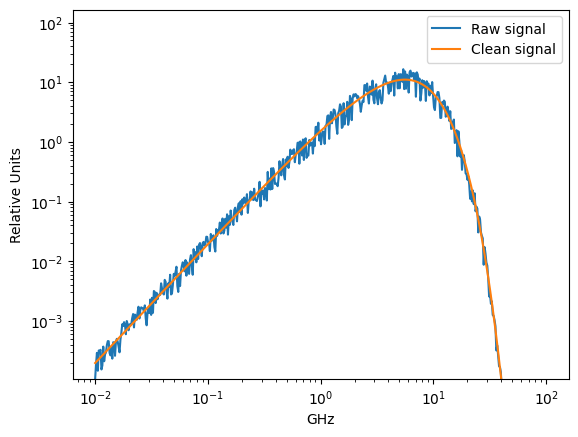

In [122]:
import random

X0 = 100
X = np.geomspace(10e-3 , X0, 500)
T = temp[1]
clean = Bv(X, T)

noise = np.random.random(len(clean))-1/2

signal = clean + noise*clean

# meanSignal = signal.copy()
# for i in range(0, len(noise)):
#     meanSignal[i] = np.nanmedian(signal[i:i+5])

# meanSignal = np.abs(meanSignal)

plt.xlabel("GHz")
plt.ylabel("Relative Units")
plt.plot(X, signal, label = "Raw signal")
plt.plot(X, clean, label = "Clean signal")
# plt.plot(X, meanSignal, label = "Median")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylim(signal[0], max(signal)*10)
plt.show()

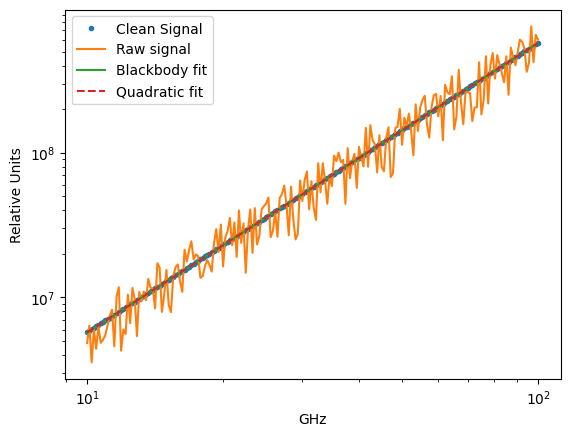

In [131]:
from scipy import optimize

def quadratic(x, a):
    return a*x**2

X0 = 100
X = np.geomspace(10 , X0, 200)
T = temp[17]
Y = Bv(X, T)
noise = np.random.random(len(Y))-1/2
signal = Y + noise*Y

plt.plot(X, Y, ".",label = "Clean Signal")
plt.plot(X, signal, label = "Raw signal")

popt, pcov = optimize.curve_fit(Bv, X, signal)
popt1, pcov1 = optimize.curve_fit(quadratic, X, signal)

plt.yscale('log')
plt.xscale('log')
# plt.xlim(10**9, 50*10**9)
# plt.ylim(10**-26, Bv(100000, vpeak)*10)

plt.plot(X, Bv(X, *popt), label = "Blackbody fit")
plt.plot(X, quadratic(X, *popt1), "--", label = "Quadratic fit")
plt.xlabel("GHz")
plt.ylabel("Relative Units")
plt.legend()
plt.show()

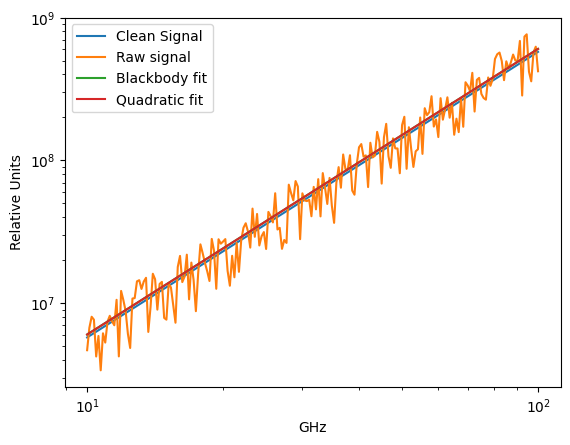

In [124]:
plt.plot(X, Y, label = "Clean Signal")
plt.plot(X, signal, label = "Raw signal")
plt.plot(X, Bv(X, *popt), label = "Blackbody fit")
plt.plot(X, quadratic(X, *popt1), label = "Quadratic fit")
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel("GHz")
plt.ylabel("Relative Units")
plt.show()

In [125]:
T
T_Bv = popt[0]
power = 6.62607015/1.380649 *10**(-2)
T_quadr = popt1[0]*power
per_Bv = np.abs(T-T_Bv)/T *100
per_quadr = np.abs(T-T_quadr)/T *100

print("Estimated absolute temperature " + str(T_quadr))
print(per_Bv)
print(per_quadr)

Estimated absolute temperature 2899.614886766436
4.865465955089333
4.795703683735695
